In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

In [5]:
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
df = pd.read_csv('diabetes.csv', names=names, header=0)
df

,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
X = df.iloc[:, 0:-1].values
y = df['has_diabetes'].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [8]:
rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [9]:
y_result = rf_model.predict(X_test)
y_result_prob = rf_model.predict_proba(X_test)

In [10]:
print(np.shape(y_result))
print(np.shape(y_result_prob))

(192,)
(192, 2)


In [11]:
y_result[2], y_result_prob[2]

(1, array([0.475, 0.525]))

[Text(0.5, 1.0, 'ROC Curve for on PIMA diabetes problem'),
 (-0.01, 1.01),
 (-0.01, 1.01)]

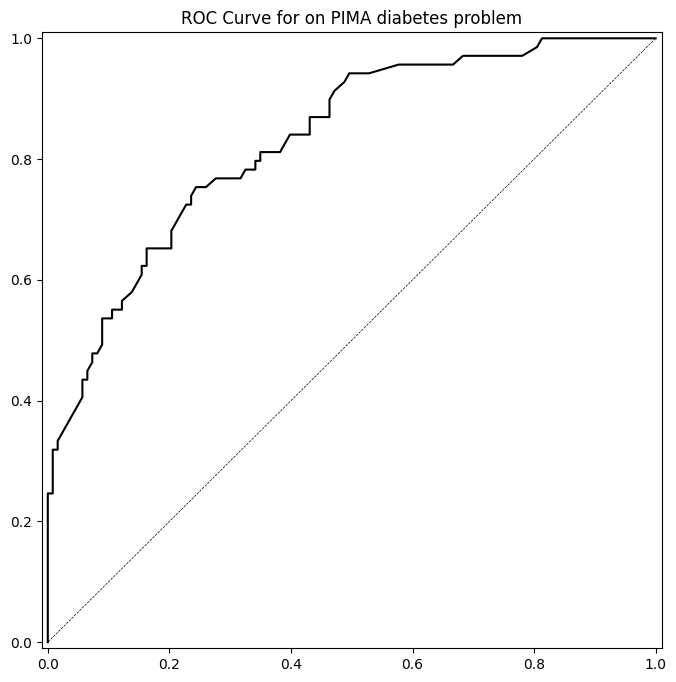

In [12]:
fpr, tpr, thr = roc_curve(y_test,y_result_prob[:, 1])
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(fpr, tpr, 'k-')
ax.plot([1,0],[1,0],'k--', linewidth=.5)
ax.set(title='ROC Curve for on PIMA diabetes problem',xlim=[-0.01, 1.01], ylim=[-0.01,1.01])

In [13]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [19]:
model = Sequential()
model.add(Dense(12,input_shape=(8,),activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                108       
                                                                 
 dense_4 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(SGD(learning_rate=.003),"binary_crossentropy", metrics=["accuracy"])
run_hist = model.fit(X_train_norm, y_train, validation_data=(X_test_norm,y_test), epochs=200)

Epoch 1/200
18/18 [==============================] - 2s 19ms/step - loss: 0.5254 - accuracy: 0.7396 - val_loss: 0.5404 - val_accuracy: 0.7188
Epoch 2/200
18/18 [==============================] - 0s 6ms/step - loss: 0.5251 - accuracy: 0.7396 - val_loss: 0.5401 - val_accuracy: 0.7188
Epoch 3/200
18/18 [==============================] - 0s 7ms/step - loss: 0.5248 - accuracy: 0.7396 - val_loss: 0.5399 - val_accuracy: 0.7240
Epoch 4/200
18/18 [==============================] - 0s 7ms/step - loss: 0.5246 - accuracy: 0.7396 - val_loss: 0.5396 - val_accuracy: 0.7292
Epoch 5/200
18/18 [==============================] - 0s 7ms/step - loss: 0.5243 - accuracy: 0.7396 - val_loss: 0.5393 - val_accuracy: 0.7292
Epoch 6/200
18/18 [==============================] - 0s 7ms/step - loss: 0.5240 - accuracy: 0.7396 - val_loss: 0.5391 - val_accuracy: 0.7292
Epoch 7/200
18/18 [==============================] - 0s 9ms/step - loss: 0.5237 - accuracy: 0.7378 - val_loss: 0.5388 - val_accuracy: 0.7292
Epoch 8/200


In [29]:
#y_pred_class_nn_1 = model.predict_clacess(X_test_norm)
y_pred_prob_nn_1 = model.predict(X_test_norm)
y_pred_class_nn_1 = np.argmax(y_pred_prob_nn_1,axis=-1)

6/6 [==============================] - 0s 3ms/step


In [30]:
y_pred_prob_nn_1

array([[0.44769746],
       [0.6439042 ],
       [0.2812773 ],
       [0.25357953],
       [0.20945217],
       [0.47300103],
       [0.09934085],
       [0.29528087],
       [0.7761514 ],
       [0.2511076 ],
       [0.2089393 ],
       [0.18614976],
       [0.7074632 ],
       [0.16571225],
       [0.67439413],
       [0.48893458],
       [0.2755691 ],
       [0.27781698],
       [0.5650561 ],
       [0.2917064 ],
       [0.30528188],
       [0.09363827],
       [0.24968536],
       [0.73409426],
       [0.43603384],
       [0.6620538 ],
       [0.47566503],
       [0.6330341 ],
       [0.17580676],
       [0.8112114 ],
       [0.29748988],
       [0.3921412 ],
       [0.3225665 ],
       [0.4458555 ],
       [0.25366828],
       [0.59983295],
       [0.7841    ],
       [0.35939518],
       [0.29192492],
       [0.4196588 ],
       [0.73888737],
       [0.28644714],
       [0.70102173],
       [0.6716403 ],
       [0.15954067],
       [0.21367575],
       [0.41930985],
       [0.222